<a href="https://colab.research.google.com/github/ogreen8084/ML_AutoML/blob/main/Auto_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoSklearn

In this notebook, we will explore the AutoSklearn toolkit. AutoSklearn is a "drop-in replacement" for Sklearn that is meant to free the machine learning user from having to perform algorithm selection and hyperparameter tuning by using Bayesian optimization, meta-learning and ensemble construction  [AutoSklearn link](https://automl.github.io/auto-sklearn/master/).  

The dataset that we will use in this notebook is a Mobile Phone Classification dataset from Kaggle [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification). The dataset has 20 featues and one target column, price range. Prices belong to one of four categories, in ordinal form from 0 to 3. We will use AutoSklearn to attempt to predict the price range that phones belong to based on phone features. 

Import basic libraries and modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This block can be commented out if Google Drive is not utilized. 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/train_phone.csv')

# Data Analysis

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

All features have a range of unique values, but all appear to either be in binary, ordinal or continuous form already so not much needs to be done in terms of feature engineering. 

In [ ]:
for col in df.columns:
    print(col + ' has ' + str(df[col].nunique()) + ' unique values.')
    print('------------')

battery_power has 1094 unique values.
------------
blue has 2 unique values.
------------
clock_speed has 26 unique values.
------------
dual_sim has 2 unique values.
------------
fc has 20 unique values.
------------
four_g has 2 unique values.
------------
int_memory has 63 unique values.
------------
m_dep has 10 unique values.
------------
mobile_wt has 121 unique values.
------------
n_cores has 8 unique values.
------------
pc has 21 unique values.
------------
px_height has 1137 unique values.
------------
px_width has 1109 unique values.
------------
ram has 1562 unique values.
------------
sc_h has 15 unique values.
------------
sc_w has 19 unique values.
------------
talk_time has 19 unique values.
------------
three_g has 2 unique values.
------------
touch_screen has 2 unique values.
------------
wifi has 2 unique values.
------------
price_range has 4 unique values.
------------


Visually displaying the features vs. price range distribution for ordinal/binary feature values.

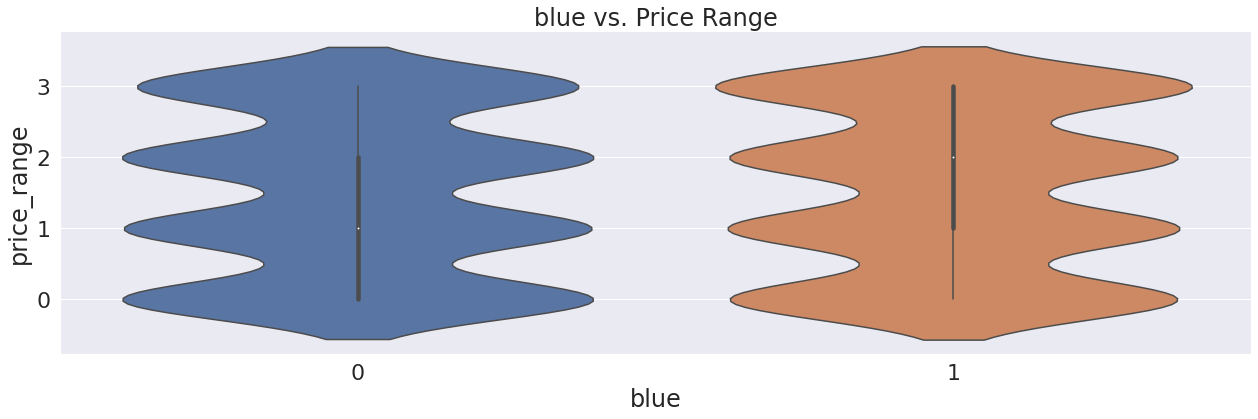

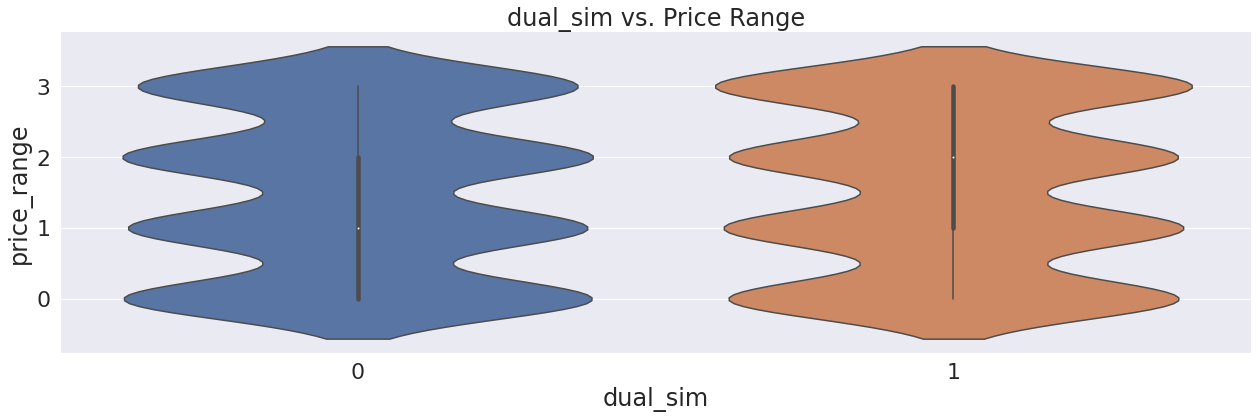

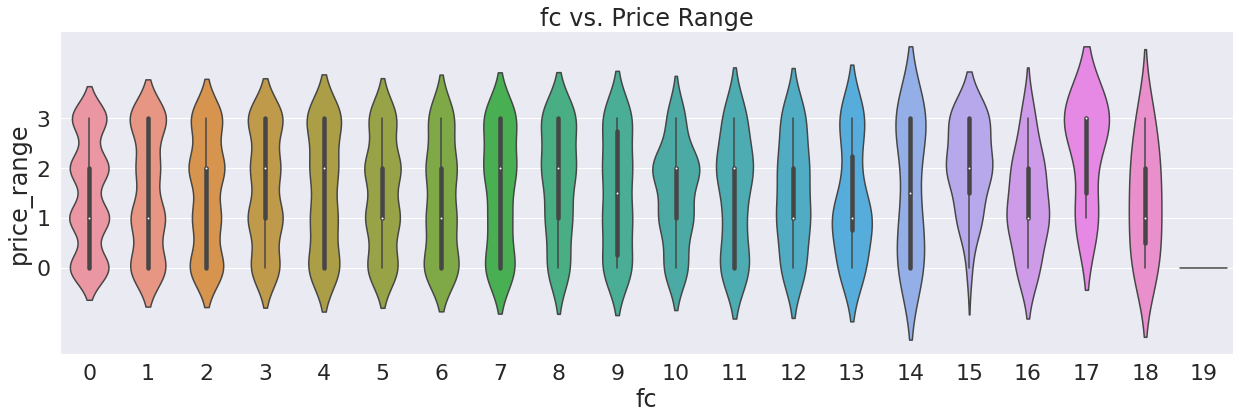

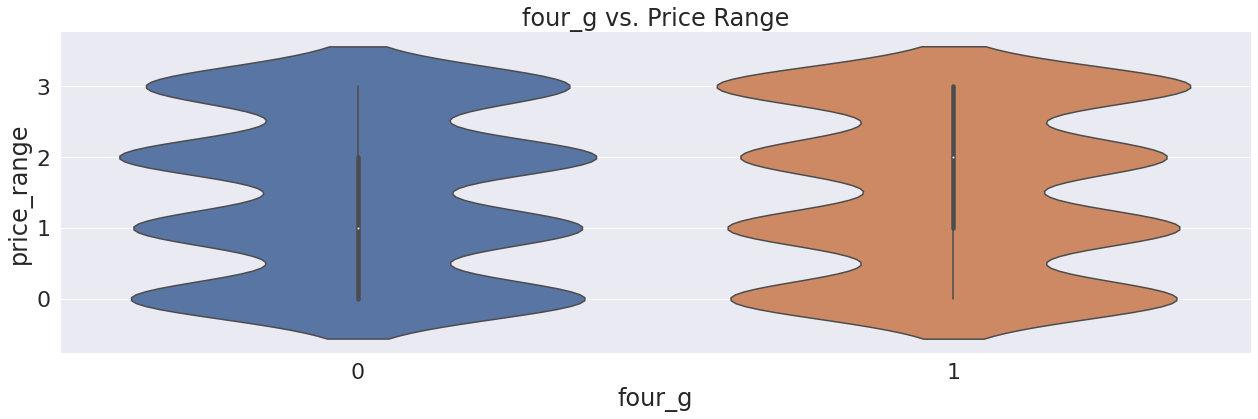

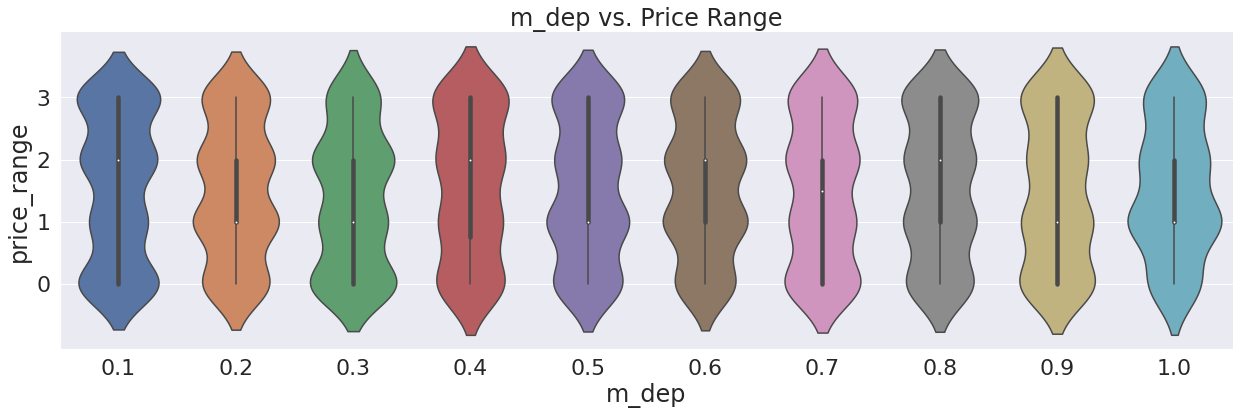

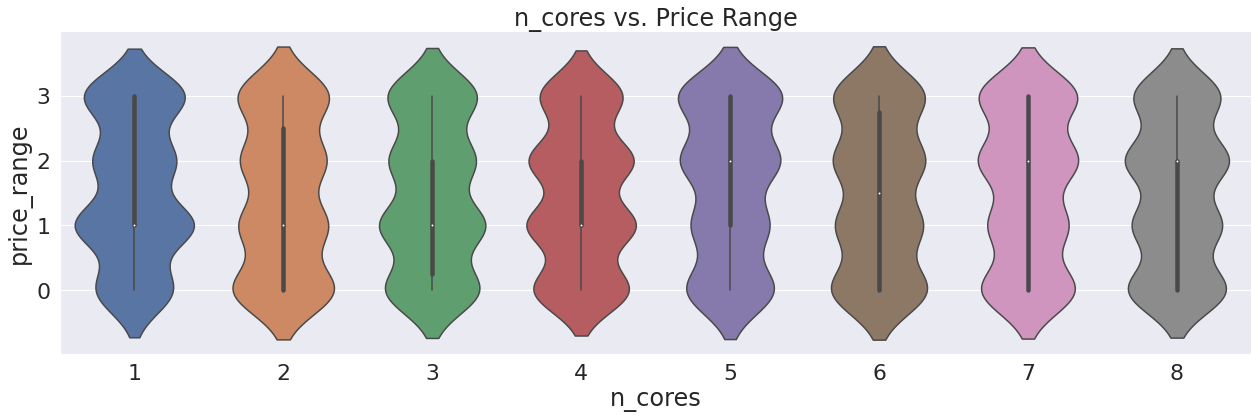

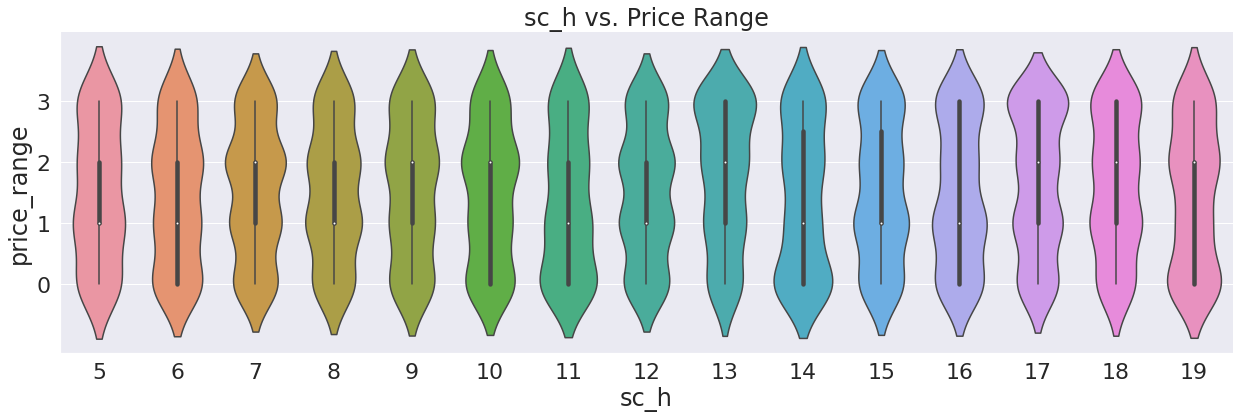

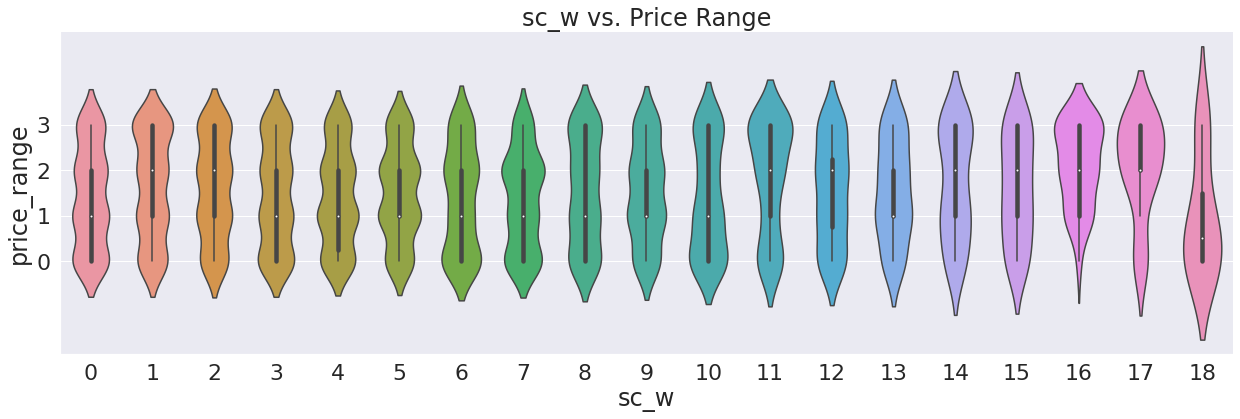

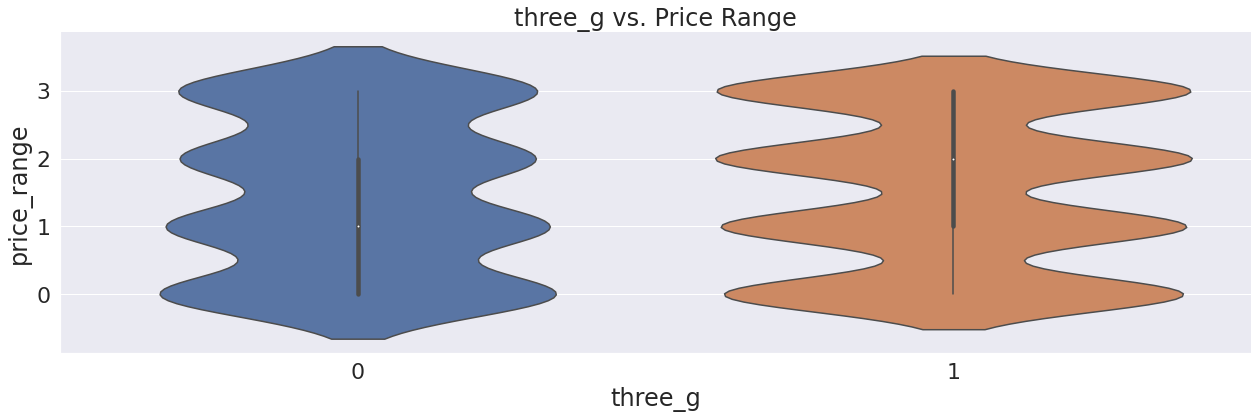

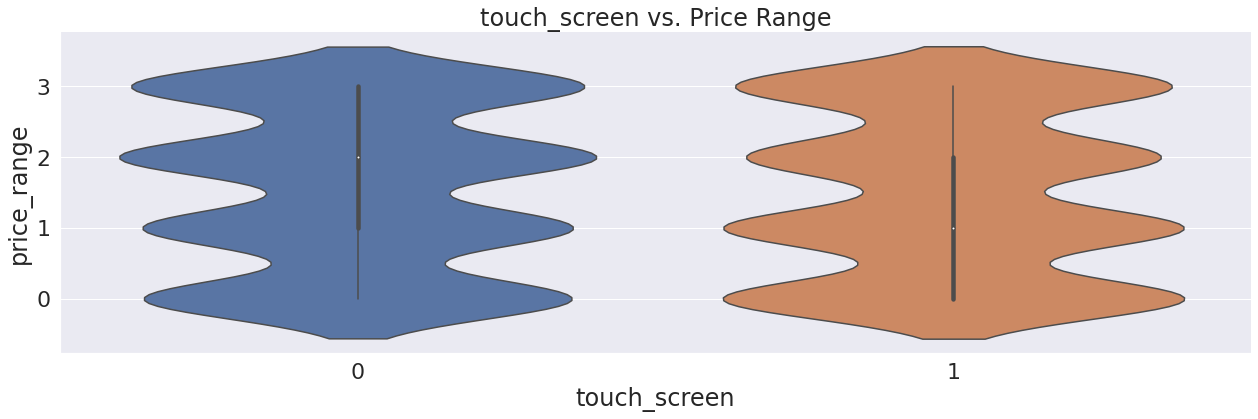

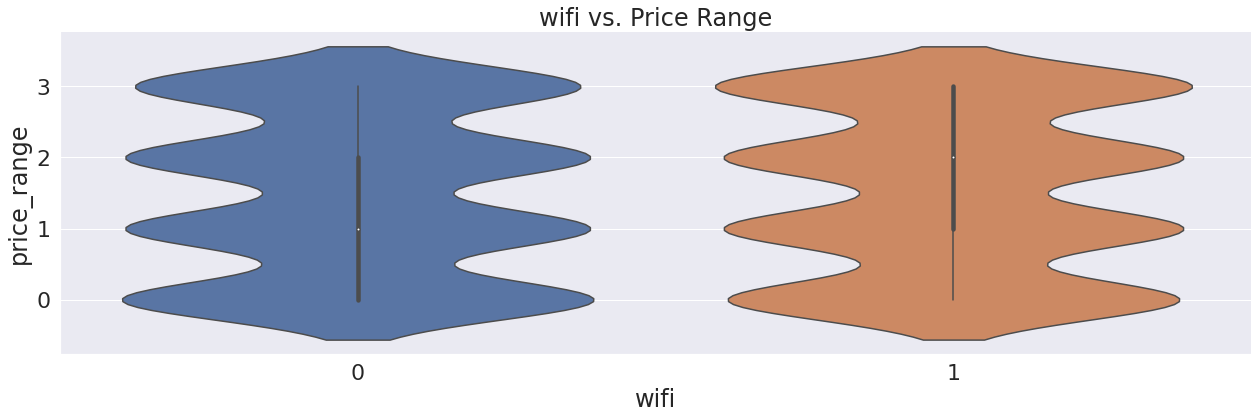

In [ ]:
sns.set(font_scale=2)
for col in ['blue', 'dual_sim', 'fc', 'four_g', 'm_dep', 'n_cores', 'sc_h', 'sc_w', 'three_g', 'touch_screen', 'wifi']:
    sns.catplot(y='price_range', x=col, data=df.sort_values('price_range', ascending=False), kind='violin', height=6, aspect=3)
    plt.yticks([0,1,2,3])
    plt.title(col +' vs. Price Range')
    plt.show()

# AutoSklearn Implementation

We will now implement AutoSklearn. The benefit of AutoSklearn is we don't have to do the manual tuning/prepping or model selection of "regular" sklearn.  


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

Split the data into training and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=102)

In [ ]:
#uncomment next line to run
#!pip install auto-sklearn

Import AutoSklearn & train model. 


To get "best performance", AutoSklearn uses ensemble selection, but we will score the model on the best performing model, as a result, we will set "ensemble_size" = 1.

In [ ]:
import autosklearn.classification as clf
import autosklearn

scorer = autosklearn.metrics.accuracy


In [ ]:
auto = clf.AutoSklearnClassifier(
    time_left_for_this_task = 1200,
    metric= scorer,
    ensemble_size=1,
    n_jobs=-1, resampling_strategy='cv', resampling_strategy_arguments={'folds': 10})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 1}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  """


In [ ]:
auto.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  Parameters
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  Parameters
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator VarianceThreshold from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      ensemble_kwargs={'ensemble_size': 1}, ensemble_size=1,
                      metric=accuracy, n_jobs=-1, per_run_time_limit=240,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10},
                      time_left_for_this_task=1200)

We needed two commands to call and train 40 potential models.

In [ ]:
results = pd.DataFrame(auto.cv_results_).sort_values(by='mean_test_score', ascending=False)
results

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_balancing:strategy,param_classifier:__choice__,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,...,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_max,param_data_preprocessor:feature_type:numerical_transformer:rescaling:robust_scaler:q_min,param_feature_preprocessor:fast_ica:n_components,param_feature_preprocessor:kernel_pca:coef0,param_feature_preprocessor:kernel_pca:degree,param_feature_preprocessor:kernel_pca:gamma,param_feature_preprocessor:nystroem_sampler:coef0,param_feature_preprocessor:nystroem_sampler:degree,param_feature_preprocessor:nystroem_sampler:gamma,param_feature_preprocessor:select_rates_classification:mode
35,0.944000,1,23.034094,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,mlp,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0.941333,2,20.735029,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,mlp,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0.925333,3,62.854033,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,mlp,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,0.918667,4,22.738751,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,extra_trees,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0.909333,5,85.601323,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,gradient_boosting,feature_type,polynomial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.904000,6,27.653319,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,random_forest,feature_type,liblinear_svc_preprocessor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0.900000,7,56.788869,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,gradient_boosting,feature_type,no_preprocessing,...,0.731064,0.283639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.898667,8,95.221574,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,gradient_boosting,feature_type,polynomial,...,0.965272,0.041903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.898000,9,15.112629,"{'balancing:strategy': 'weighting', 'classifie...",Success,0.0,weighting,gradient_boosting,feature_type,no_preprocessing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.880667,10,29.200650,"{'balancing:strategy': 'none', 'classifier:__c...",Success,0.0,none,random_forest,feature_type,feature_agglomeration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
auto.leaderboard(detailed=True, ensemble_only=False)

,rank,ensemble_weight,type,cost,duration,config_id,train_loss,seed,start_time,end_time,budget,status,data_preprocessors,feature_preprocessors,balancing_strategy,config_origin
model_id,,,,,,,,,,,,,,,,
37,1,1.0,mlp,0.056000,23.034094,36,0.053778,0,1.664106e+09,1.664106e+09,0.0,StatusType.SUCCESS,[],[liblinear_svc_preprocessor],weighting,Random Search (sorted)
16,2,0.0,mlp,0.058667,20.735029,15,0.040815,0,1.664105e+09,1.664105e+09,0.0,StatusType.SUCCESS,[],[liblinear_svc_preprocessor],none,Initial design
13,3,0.0,mlp,0.074667,62.854033,12,0.002370,0,1.664105e+09,1.664105e+09,0.0,StatusType.SUCCESS,[],[feature_agglomeration],weighting,Initial design
29,4,0.0,extra_trees,0.081333,22.738751,28,0.030889,0,1.664106e+09,1.664106e+09,0.0,StatusType.SUCCESS,[],[liblinear_svc_preprocessor],none,Random Search (sorted)
24,5,0.0,gradient_boosting,0.090667,85.601323,23,0.012593,0,1.664106e+09,1.664106e+09,0.0,StatusType.SUCCESS,[],[polynomial],none,Initial design
5,6,0.0,random_forest,0.096000,27.653319,4,0.001630,0,1.664105e+09,1.664105e+09,0.0,StatusType.SUCCESS,[],[liblinear_svc_preprocessor],weighting,Initial design
26,7,0.0,gradient_boosting,0.100000,56.788869,25,0.000000,0,1.664106e+09,1.664106e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Initial design
7,8,0.0,gradient_boosting,0.101333,95.221574,6,0.000000,0,1.664105e+09,1.664105e+09,0.0,StatusType.SUCCESS,[],[polynomial],weighting,Initial design
11,9,0.0,gradient_boosting,0.102000,15.112629,10,0.008963,0,1.664105e+09,1.664105e+09,0.0,StatusType.SUCCESS,[],[no_preprocessing],weighting,Initial design


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ypred_train = auto.predict(Xtrain)
ypred_test = auto.predict(Xtest)

acc = accuracy_score(ytrain, ypred_train)

print('Training accuracy: ' + str(acc))


acc_test = accuracy_score(ytest, ypred_test)
print('Test accuracy: ' + str(acc_test))

Training accuracy: 0.9513333333333334
Test accuracy: 0.948


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer 